In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bakery_sales.csv")

In [3]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend
5,3,Cookies,10/30/2016 10:07,morning,weekend
6,4,Muffin,10/30/2016 10:08,morning,weekend
7,5,Coffee,10/30/2016 10:13,morning,weekend
8,5,Pastry,10/30/2016 10:13,morning,weekend
9,5,Bread,10/30/2016 10:13,morning,weekend


In [ ]:
#clean data; narrow down items

In [16]:
items = ['Bread', 'Hot Chocolate', 'Cookies', 'Muffin', 'Coffee', 'Tea', 
         'Smoothies', 'Cake', 'Soup', 'Toast', 'Truffles', 'Salad', 'Sandwich', 
         'Baguette', 'Caramel Bites', 'Granola', 'Crepes', 'Chocolates']


items_df = df[df['Item'].isin(items)]

In [17]:
items_df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
5,3,Cookies,10/30/2016 10:07,morning,weekend
6,4,Muffin,10/30/2016 10:08,morning,weekend
7,5,Coffee,10/30/2016 10:13,morning,weekend
9,5,Bread,10/30/2016 10:13,morning,weekend
...,...,...,...,...,...
20500,9682,Muffin,4/9/2017 14:32,afternoon,weekend
20502,9682,Coffee,4/9/2017 14:32,afternoon,weekend
20503,9682,Tea,4/9/2017 14:32,afternoon,weekend
20504,9683,Coffee,4/9/2017 14:57,afternoon,weekend


In [18]:
print(type(items_df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
print(items_df.describe)

<bound method NDFrame.describe of        Transaction       Item         date_time period_day weekday_weekend
0                1      Bread   10/30/2016 9:58    morning         weekend
5                3    Cookies  10/30/2016 10:07    morning         weekend
6                4     Muffin  10/30/2016 10:08    morning         weekend
7                5     Coffee  10/30/2016 10:13    morning         weekend
9                5      Bread  10/30/2016 10:13    morning         weekend
...            ...        ...               ...        ...             ...
20500         9682     Muffin    4/9/2017 14:32  afternoon         weekend
20502         9682     Coffee    4/9/2017 14:32  afternoon         weekend
20503         9682        Tea    4/9/2017 14:32  afternoon         weekend
20504         9683     Coffee    4/9/2017 14:57  afternoon         weekend
20506         9684  Smoothies    4/9/2017 15:04  afternoon         weekend

[12724 rows x 5 columns]>


In [ ]:
#Distribution of sales

In [20]:
items_sold = items_df['Item'].value_counts()

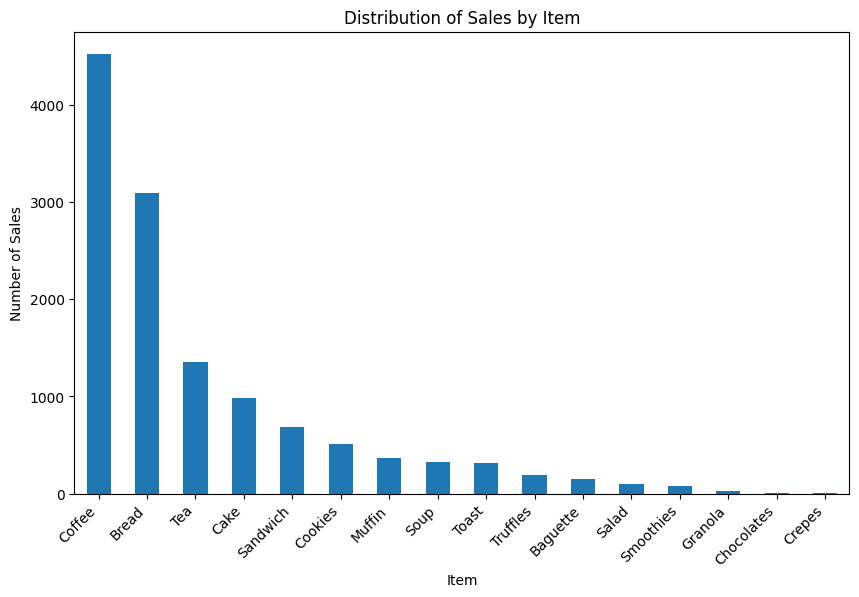

In [21]:
items_sold.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution of Sales by Item')

plt.xlabel('Item')

plt.ylabel('Number of Sales')

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# Average items per transaction

In [33]:
avg_items_per_transaction = items_df.groupby('Transaction').size().mean()
print(f'Average items per transaction: {avg_items_per_transaction}')

Average items per transaction: 1.5365294046612727


In [ ]:
# Top 10 most sold items

In [35]:
top_items = items_df['Item'].value_counts().head(10)

In [ ]:
# Plotting the top 10 items sold

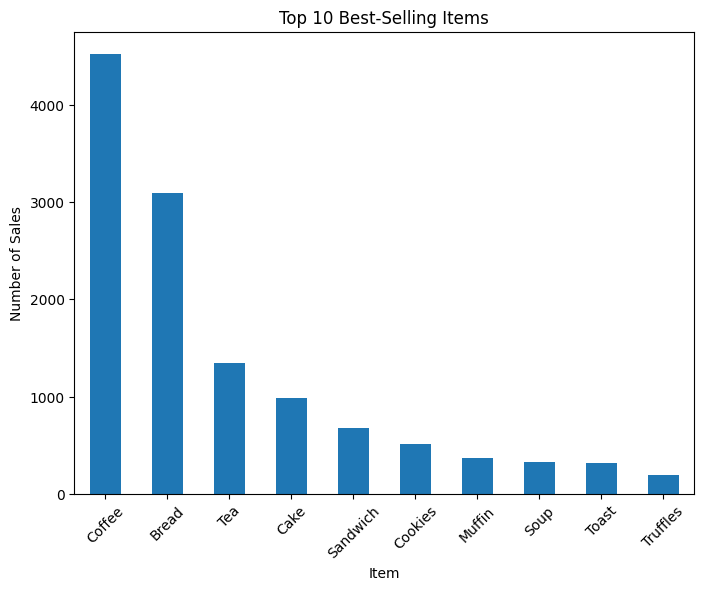

In [36]:
top_items.plot(kind='bar', figsize=(8, 6))

plt.title('Top 10 Best-Selling Items')

plt.xlabel('Item')

plt.ylabel('Number of Sales')

plt.xticks(rotation=45)

plt.show()


In [ ]:
# Plotting the bottom 5 items sold

In [43]:
item_sales = items_df['Item'].value_counts()

In [44]:
worst_performers = item_sales.sort_values(ascending=True)

In [45]:
print(worst_performers.head(5))

Item
Crepes         6
Chocolates     9
Granola       28
Smoothies     77
Salad         99
Name: count, dtype: int64


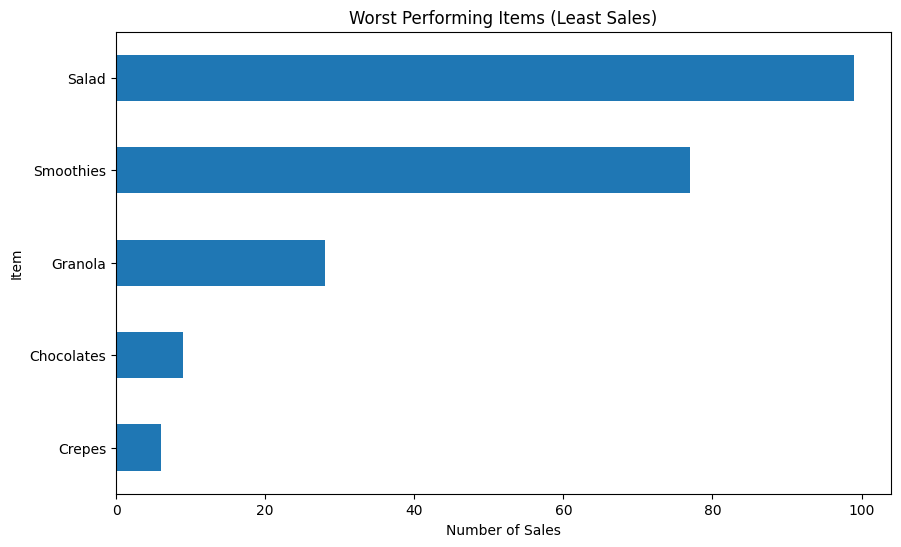

In [46]:
worst_performers.head(5).plot(kind='barh', figsize=(10, 6))

plt.title('Worst Performing Items (Least Sales)')

plt.xlabel('Number of Sales')

plt.ylabel('Item')

plt.show()

In [ ]:
#check for duplicates

In [23]:
items_df[items_df.duplicated() == True]

,Transaction,Item,date_time,period_day,weekday_weekend


In [ ]:
#reset index

In [10]:
items_df.reset_index(drop = True)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,3,Cookies,10/30/2016 10:07,morning,weekend
2,4,Muffin,10/30/2016 10:08,morning,weekend
3,5,Coffee,10/30/2016 10:13,morning,weekend
4,5,Bread,10/30/2016 10:13,morning,weekend
...,...,...,...,...,...
14157,9682,Muffin,4/9/2017 14:32,afternoon,weekend
14158,9682,Coffee,4/9/2017 14:32,afternoon,weekend
14159,9682,Tea,4/9/2017 14:32,afternoon,weekend
14160,9683,Coffee,4/9/2017 14:57,afternoon,weekend


In [ ]:
#fix types

In [24]:
items_df.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [28]:
items_df['date_time'] = pd.to_datetime(items_df['date_time'])

C:\Users\david\AppData\Local\Temp\ipykernel_83028\2116237487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['date_time'] = pd.to_datetime(items_df['date_time'])


In [25]:
items_df['period_day'] = items_df['period_day'].astype('category')
items_df['weekday_weekend'] = items_df['weekday_weekend'].astype('category')

C:\Users\david\AppData\Local\Temp\ipykernel_83028\875887182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['period_day'] = items_df['period_day'].astype('category')
C:\Users\david\AppData\Local\Temp\ipykernel_83028\875887182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['weekday_weekend'] = items_df['weekday_weekend'].astype('category')


In [29]:
items_df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [30]:
items_df.dtypes

Transaction                 int64
Item                       object
date_time          datetime64[ns]
period_day               category
weekday_weekend          category
dtype: object

In [ ]:
#Rename columns

In [32]:
items_df.rename(columns = {'Transaction':'transaction',
                          'Item':'item'})

,transaction,item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend
...,...,...,...,...,...
20500,9682,Muffin,2017-04-09 14:32:00,afternoon,weekend
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend


In [ ]:
#sales distribution by item and time of day

In [60]:
items_df['hour_12'] = items_df['date_time'].dt.strftime('%I %p')

C:\Users\david\AppData\Local\Temp\ipykernel_83028\4020727416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['hour_12'] = items_df['date_time'].dt.strftime('%I %p')


In [61]:
print(items_df[['date_time', 'hour_12']].head())

            date_time hour_12
0 2016-10-30 09:58:00   09 AM
5 2016-10-30 10:07:00   10 AM
6 2016-10-30 10:08:00   10 AM
7 2016-10-30 10:13:00   10 AM
9 2016-10-30 10:13:00   10 AM


In [62]:
heatmap_data = items_df.pivot_table(index='hour_12', columns='Item', aggfunc='size', fill_value=0)

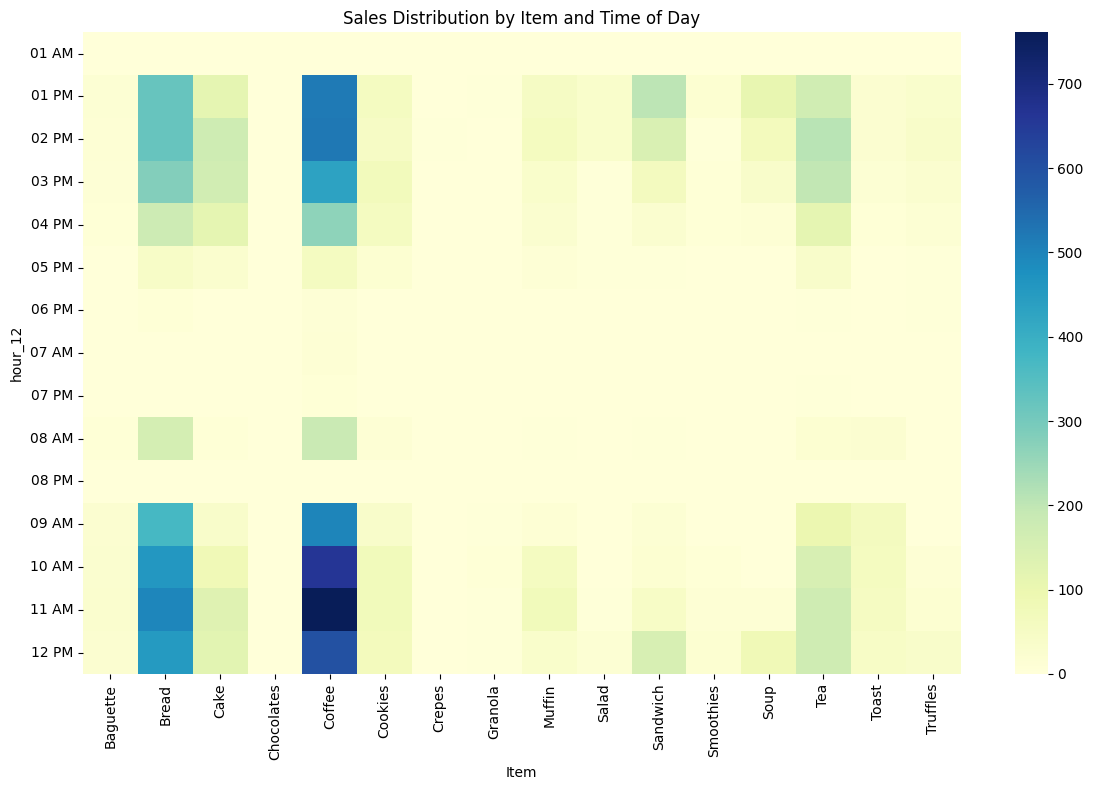

In [68]:
plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data, cmap='YlGnBu')

plt.title('Sales Distribution by Item and Time of Day')

plt.tight_layout()

plt.show()

In [ ]:
#hourly sales distribution

In [69]:
sales_by_hour = items_df['hour_12'].value_counts().sort_index()

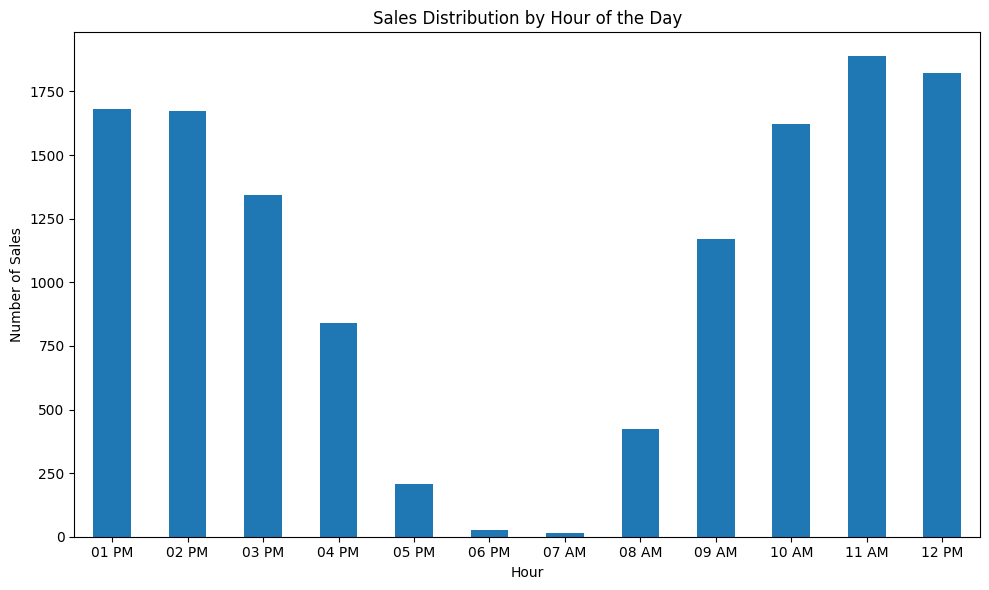

In [71]:
unwanted_hours = ['01 AM', '07 PM', '08 PM']

sales_by_hour = sales_by_hour[~sales_by_hour.index.isin(unwanted_hours)]



sales_by_hour.plot(kind='bar', figsize=(10, 6))

plt.title('Sales Distribution by Hour of the Day')

plt.xlabel('Hour')

plt.ylabel('Number of Sales')

plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

In [39]:
items_df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend
...,...,...,...,...,...
20500,9682,Muffin,2017-04-09 14:32:00,afternoon,weekend
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend


In [40]:
items_df.reset_index(drop = True)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,3,Cookies,2016-10-30 10:07:00,morning,weekend
2,4,Muffin,2016-10-30 10:08:00,morning,weekend
3,5,Coffee,2016-10-30 10:13:00,morning,weekend
4,5,Bread,2016-10-30 10:13:00,morning,weekend
...,...,...,...,...,...
12719,9682,Muffin,2017-04-09 14:32:00,afternoon,weekend
12720,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend
12721,9682,Tea,2017-04-09 14:32:00,afternoon,weekend
12722,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend
